In [3]:
# Import
from keras.datasets import mnist

Read MNIST dataset
Create a function which takes this data, splits it into train and test and tell shape of each dataset

In [4]:
# prompt: Please give me code to read dataset from mnist and print shape of each dataset

from keras.datasets import mnist

# Read MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Create a function which takes this data, splits it into train and test and tell shape of each dataset
def print_shape(x_train, y_train, x_test, y_test):
  print("x_train shape:", x_train.shape)
  print("y_train shape:", y_train.shape)
  print("x_test shape:", x_test.shape)
  print("y_test shape:", y_test.shape)

print_shape(X_train, y_train, X_test, y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


Print some sample images , just to look at the dataset

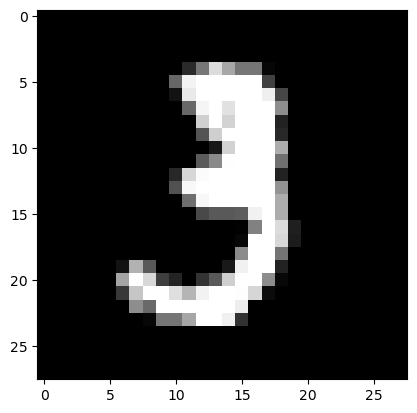

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure
plt.imshow(X_train[10],cmap='gray')
plt.show()

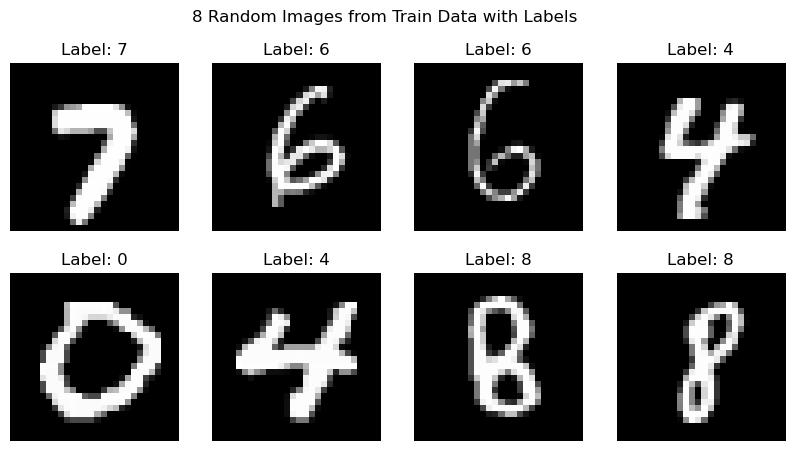

In [6]:
import random

# Select 8 random indices from the training set
random_indices = random.sample(range(len(X_train)), 8)

# Plot the images and their corresponding labels
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
for i, index in enumerate(random_indices):
    ax = axes[i // 4, i % 4]
    ax.imshow(X_train[index], cmap="gray")
    ax.set_title(f"Label: {y_train[index]}")
    ax.axis("off")

plt.suptitle("8 Random Images from Train Data with Labels")
plt.show()

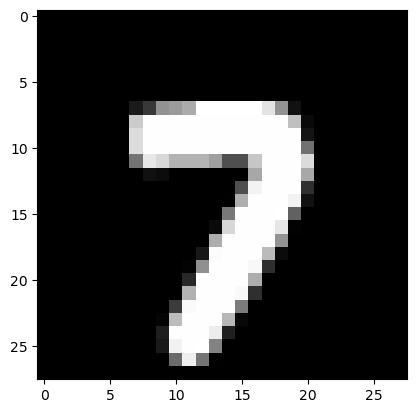

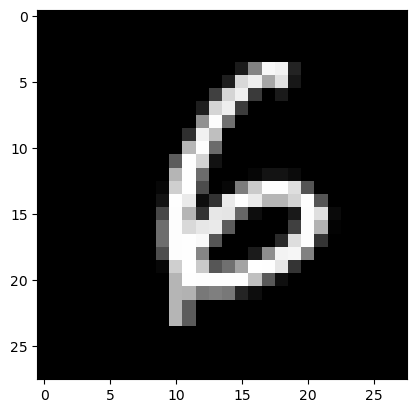

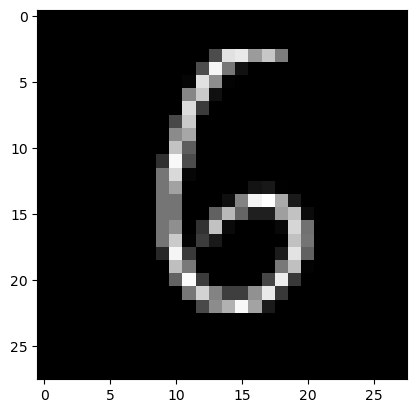

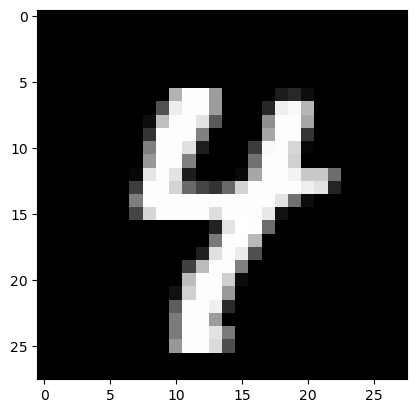

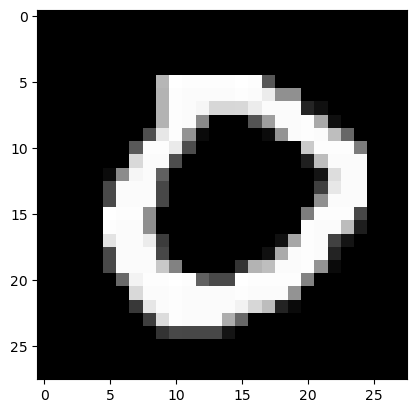

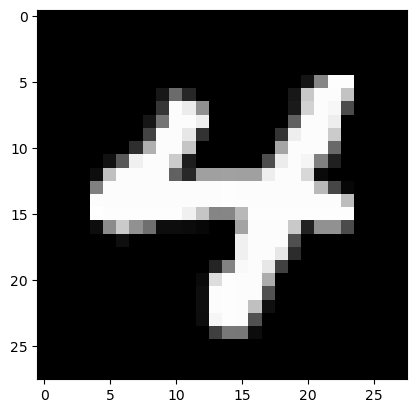

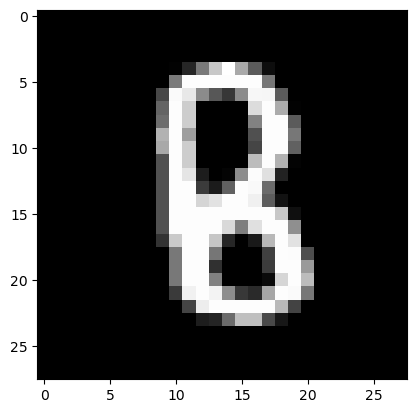

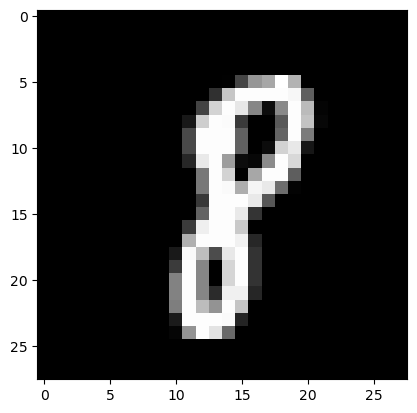

In [7]:
for i in random_indices:
  plt.imshow(X_train[i],cmap='gray')
  plt.show()

In [8]:
X_train[0].shape

(28, 28)

In [9]:
import numpy as np

In [10]:
np.max(X_train[0]),np.min(X_train[0])

(255, 0)

In [11]:
# Build a ANN model using this
# 28x28 =784
# reshape your data
# scale this data Min-Max scaling

# Model Parameters
NUM_ROWS = 28
NUM_COLS = 28

# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))

#Scaling the data
X_train = X_train.astype('float32') / 255 #max scaling
X_test = X_test.astype('float32') / 255

In [12]:
np.max(X_train[0]),np.min(X_train[0])

(1.0, 0.0)

# Create a simple Neural Network Model which has

Input Layer
3 Hidden Layers - 64,32,16 neurons & uses relu activation
Output Layer ->

model.compile - Use adam optimiser, loss as per , accuracy as a metric

In [13]:
from keras import models
from keras.layers import Dense, Dropout


In [14]:
# Build neural network
model = models.Sequential()
model.add(Dense(64, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,018 (207.10 KB)

 Trainable params: 53,018 (207.10 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
y_train[2]

4

In [17]:
from keras.utils import to_categorical
# Categorically encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [18]:

# Train model
model.fit(X_train, y_train,
          batch_size=10,
          epochs=20,
          validation_data=(X_test, y_test))


Epoch 1/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 2s 364us/step - accuracy: 0.8528 - loss: 0.4728 - val_accuracy: 0.9513 - val_loss: 0.1608
Epoch 2/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 2s 368us/step - accuracy: 0.9581 - loss: 0.1388 - val_accuracy: 0.9653 - val_loss: 0.1192
Epoch 3/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 2s 361us/step - accuracy: 0.9698 - loss: 0.0981 - val_accuracy: 0.9679 - val_loss: 0.1092
Epoch 4/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 2s 345us/step - accuracy: 0.9772 - loss: 0.0736 - val_accuracy: 0.9696 - val_loss: 0.0998
Epoch 5/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 2s 342us/step - accuracy: 0.9809 - loss: 0.0630 - val_accuracy: 0.9707 - val_loss: 0.1115
Epoch 6/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 2s 346us/step - accuracy: 0.9812 - loss: 0.0597 - val_accuracy: 0.9719 - val_loss: 0.1015
Epoch 7/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 2s 349us/step - accuracy: 0.9852 - loss: 0.0491 - val_accuracy: 0.9728 - val_loss: 0.1029
Epoch 8/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 2s 345us/step - accuracy: 0.9873 -

In [19]:
model = models.Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



# Train model
model.fit(X_train, y_train,
          batch_size=10,
          epochs=20,
          validation_data=(X_test, y_test))


Epoch 1/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 4s 588us/step - accuracy: 0.8226 - loss: 0.5634 - val_accuracy: 0.9575 - val_loss: 0.1496
Epoch 2/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 4s 586us/step - accuracy: 0.9454 - loss: 0.1918 - val_accuracy: 0.9660 - val_loss: 0.1134
Epoch 3/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 4s 600us/step - accuracy: 0.9583 - loss: 0.1463 - val_accuracy: 0.9711 - val_loss: 0.0990
Epoch 4/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 4s 583us/step - accuracy: 0.9648 - loss: 0.1254 - val_accuracy: 0.9736 - val_loss: 0.0934
Epoch 5/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 4s 592us/step - accuracy: 0.9672 - loss: 0.1165 - val_accuracy: 0.9756 - val_loss: 0.0858
Epoch 6/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 4s 592us/step - accuracy: 0.9681 - loss: 0.1068 - val_accuracy: 0.9749 - val_loss: 0.0844
Epoch 7/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 4s 588us/step - accuracy: 0.9720 - loss: 0.0956 - val_accuracy: 0.9759 - val_loss: 0.0923
Epoch 8/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 4s 598us/step - accuracy: 0.9745 -


**2. How can you implement this using a CNN - 5 minutes**




In [ ]:
# We don't need to reshape our data
# CNNs are optimised for image input

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()



In [ ]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


In [ ]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
del model

In [ ]:
from keras import layers
model = models.Sequential(
    [
        #CNN
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),


        #bridge between CNNS and FC layers
        layers.Flatten(),

        # FC layers
        layers.Dense(16, activation="relu"),
        layers.Dense(10, activation="softmax")


    ]
)



In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_20 (Dense)            (None, 16)              

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 46s 96ms/step - loss: 0.3249 - accuracy: 0.8988 - val_loss: 0.0920 - val_accuracy: 0.9725
Epoch 2/5
469/469 [==============================] - 44s 95ms/step - loss: 0.0770 - accuracy: 0.9771 - val_loss: 0.0492 - val_accuracy: 0.9849
Epoch 3/5
469/469 [==============================] - 44s 95ms/step - loss: 0.0544 - accuracy: 0.9835 - val_loss: 0.0465 - val_accuracy: 0.9848
Epoch 4/5
469/469 [==============================] - 45s 95ms/step - loss: 0.0431 - accuracy: 0.9871 - val_loss: 0.0391 - val_accuracy: 0.9856
Epoch 5/5
469/469 [==============================] - 45s 96ms/step - loss: 0.0365 - accuracy: 0.9888 - val_loss: 0.0383 - val_accuracy: 0.9882


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04853476583957672
Test accuracy: 0.98580002784729


In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 3s 9ms/step


In [ ]:
predictions.shape

(10000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
predictions[0]

array([1.3481322e-12, 8.9873907e-08, 3.0843185e-07, 2.6260184e-07,
       7.6317157e-09, 1.5174790e-11, 1.3189108e-20, 9.9999911e-01,
       1.0379321e-08, 7.5616775e-08], dtype=float32)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
np.argmax(predictions[10])

0

In [ ]:
np.argmax(y_test[10])

0

In [ ]:
for idx,i in enumerate(predictions[0]):
    if i == predictions[0].max():
        print(idx)


7
